In [1]:
import sys, os, time
import shutil
%pdb
# %load_ext autoreload
# %autoreload 2
os.environ['FOUNDATION_RUN_MODE'] = 'jupyter'
os.environ['FOUNDATION_SAVE_DIR'] = '/is/ei/fleeb/workspace/chome/trained_nets'
os.environ['FOUNDATION_DATA_DIR'] = '/is/ei/fleeb/workspace/local_data'
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
from IPython import display
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.distributions as distrib
import torch.multiprocessing as mp
import torchvision.models
import torchvision

from torch.utils.data import Dataset, DataLoader, TensorDataset
import gym
import numpy as np
%matplotlib notebook
# %matplotlib tk
import matplotlib.pyplot as plt
import imageio
import seaborn as sns
# plt.switch_backend('Agg') #('Qt5Agg')
import foundation as fd
from foundation import models
from foundation import util
from foundation import train

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from bisect import bisect_left

# from IPython.display import HTML, Image

#from foundation.util import replicate, Cloner

from hybrid import get_model, get_data
from analyze import *

from tqdm import tqdm_notebook as tqdm

plt.ioff()

np.set_printoptions(linewidth=120, suppress=True)

Automatic pdb calling has been turned ON


In [2]:
M = Hybrid_Controller().filter_strs('!test')

Found 98 runs


In [3]:
# M.clear_filters().filter_strs('!test').filter_jobs(167, 168).show_incomplete()

In [4]:
M.clear_run_cache()

In [8]:
M.clear_filters().filter_strs('!test')

# M.filter_datasets( 'redball', 'rgbball', '3dshapes')

# M.filter_since(date='200114').filter_data('rgbball')
# M.filter_jobs(157, 158)
# M.filter_jobs(169)
# M.filter_jobs(178)
# M.filter_jobs(174, 175)
# M.filter_models('dwae')
M.filter_datasets('3dSshape1')
# M.filter_jobs(94, 122) # basic models
# M.filter_jobs(100, 102)
# M.filter(lambda r: 'adain-dec' in r.config.info.history)
# M.filter_models('wae')

# M.filter_checkpoints(60)

# M.load_configs(60)

# M.load_configs(100)

M.sort_by('date')
pass
M.show()


  0) 3dSshape1-wae_0002-6026518-10_200129-001725
  1) 3dSshape1-fvae_0002-6026518-13_200129-002149
  2) 3dSshape1-fwae_0002-6026518-12_200129-002149
  3) 3dSshape1-vae_0002-6026518-11_200129-002213
  4) 3dSshape1-wae_0007-6027503-12_200129-124338
  5) 3dSshape1-fwae_0007-6027503-14_200129-124340
  6) 3dSshape1-fvae_0007-6027503-15_200129-124413
  7) 3dSshape1-vae_0007-6027503-13_200129-124415
  8) 3dSshape1-dvae_0010-6027546-00_200129-125909
  9) 3dSshape1-dwae_0010-6027546-01_200129-130102
 10) 3dSshape1-fdwae_0010-6027546-02_200129-130128


In [9]:
# M.prep_info(100)
M.prep_info()
M.load_records(tqdm)

Selecting checkpoint: last


/is/ei/fleeb/workspace/foundation/foundation/train/config.py:42: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f)


Loaded configs


In [10]:
M.show('all')

  0) 3dSshape1-wae_0002-6026518-10_200129-001725
	Checkpoint: 33 (approx 99000 steps)
	Steps: 99000
	output.save_freq - 3000 (5000)
	training.step_limit - 150000 (80000)
	training.val_freq - 3000 (5000)

  1) 3dSshape1-fvae_0002-6026518-13_200129-002149
	Checkpoint: 34 (approx 102000 steps)
	Steps: 102000
	output.save_freq - 3000 (5000)
	training.step_limit - 150000 (80000)
	training.val_freq - 3000 (5000)
	model.latent_reg_wt - 2 (1)

  2) 3dSshape1-fwae_0002-6026518-12_200129-002149
	Checkpoint: 32 (approx 96000 steps)
	Steps: 96000
	output.save_freq - 3000 (5000)
	training.step_limit - 150000 (80000)
	training.val_freq - 3000 (5000)
	model.latent_reg_wt - 1000 (100)
	model.reg_prior - 0.1 (0.5)

  3) 3dSshape1-vae_0002-6026518-11_200129-002213
	Checkpoint: 29 (approx 87000 steps)
	Steps: 87000
	output.save_freq - 3000 (5000)
	training.step_limit - 150000 (80000)
	training.val_freq - 3000 (5000)
	model.latent_reg_wt - 4 (1)

  4) 3dSshape1-wae_0007-6027503-12_200129-124338
	Checkpoin

In [55]:
M.clear_run_cache()

In [12]:
M.sort_by('job')
print('\n'.join('unbuffer python hybrid.py n/t/box-s1 --load {}/checkpoint_27.pth.tar'.format(n) for n in M.through().name))
print()

print('\n'.join('unbuffer python hybrid.py n/t/box-s2 --load {}/checkpoint_27.pth.tar'.format(n) for n in M.through().name))
print()

print('\n'.join('unbuffer python hybrid.py n/t/box-s3 --load {}/checkpoint_27.pth.tar'.format(n) for n in M.through().name))
print()



# print('\n'.join('unbuffer python hybrid.py n/t/box-s1-ctrl.yaml --load {}/checkpoint_27.pth.tar'.format(n) for n in M.through().name))
# print()

# print('\n'.join('unbuffer python hybrid.py n/t/box-s2-ctrl.yaml --load {}/checkpoint_27.pth.tar'.format(n) for n in M.through().name))
# print()

# print('\n'.join('unbuffer python hybrid.py n/t/box-s3-ctrl.yaml --load {}/checkpoint_27.pth.tar'.format(n) for n in M.through().name))
# print()

unbuffer python hybrid.py n/t/box-s1 --load 3dSshape1-dvae_0010-6027546-00_200129-125909/checkpoint_27.pth.tar
unbuffer python hybrid.py n/t/box-s1 --load 3dSshape1-dwae_0010-6027546-01_200129-130102/checkpoint_27.pth.tar
unbuffer python hybrid.py n/t/box-s1 --load 3dSshape1-fdwae_0010-6027546-02_200129-130128/checkpoint_27.pth.tar
unbuffer python hybrid.py n/t/box-s1 --load 3dSshape1-wae_0002-6026518-10_200129-001725/checkpoint_27.pth.tar
unbuffer python hybrid.py n/t/box-s1 --load 3dSshape1-vae_0002-6026518-11_200129-002213/checkpoint_27.pth.tar
unbuffer python hybrid.py n/t/box-s1 --load 3dSshape1-fwae_0002-6026518-12_200129-002149/checkpoint_27.pth.tar
unbuffer python hybrid.py n/t/box-s1 --load 3dSshape1-fvae_0002-6026518-13_200129-002149/checkpoint_27.pth.tar
unbuffer python hybrid.py n/t/box-s1 --load 3dSshape1-wae_0007-6027503-12_200129-124338/checkpoint_27.pth.tar
unbuffer python hybrid.py n/t/box-s1 --load 3dSshape1-vae_0007-6027503-13_200129-124415/checkpoint_27.pth.tar
unbu

In [73]:
run = M[1]
run.name

'3dshapes-dwae_0004-6026551-03_200129-003324'

In [74]:
M.clear_run_cache()

In [75]:
S = run.reset()

In [76]:
# S.A = train.get_config()
# S.A.dataset.name = '3dshapes'
# S.A.dataset.kwargs = {}

In [77]:
# S.bounds = -2,2
run.load(pbar=tqdm)

/is/ei/fleeb/workspace/chome/trained_nets/3dshapes-dwae_0004-6026551-03_200129-003324/checkpoint_39.pth.tar
True
load successful
Loaded /is/ei/fleeb/workspace/chome/trained_nets/3dshapes-dwae_0004-6026551-03_200129-003324/checkpoint_39.pth.tar
Set dataroot to: /is/ei/fleeb/workspace/local_data
dataroot: /is/ei/fleeb/workspace/local_data (in parent)
load_memory: True (by default)
train: True
labeled: False (by default)
noise: None (by default)
din: (3, 64, 64) (by default)
dout: (3, 64, 64) (by default)


/is/ei/fleeb/workspace/foundation/foundation/train/config.py:42: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f)


Dataset moved to cpu
Model-type: dwae
prob: 0.2
prob_max: None (by default)
Creating encoder (type=double-enc)
  in_shape --> din: (3, 64, 64) (in parent)
  channels: [64, 64, 64, 128, 128] (in parent)
  factors: 2 (in parent)
  internal_channels: [None, None, None, None, None] (by default)
  squeeze: [False, False, False, False, False] (by default)
  output_nonlin: None (by default)
  latent_dim: 12 (in parent)
  Creating tail (type=mlp)
    input_dim --> din: (128, 2, 2)
    output_dim --> dout: 12
    hidden_dims: [256, 128]
    nonlin: elu (in parent)
    output_nonlin: None (by default)
  nonlin: elu (in parent)
  output_nonlin: None (by default)
  output_norm_type: None (by default)
  down_type: max (in parent)
  norm_type: instance (in parent)
  residual: False (by default)
  optim_type: adam (in parent)
  lr: 0.001 (in parent)
  weight_decay: 0 (in parent)
  momentum: 0 (in parent)
  beta1: 0.9 (in parent)
  beta2: 0.999 (in parent)
  scheduler_type: plateau (in parent)
  sched

In [78]:

run.run(pbar=tqdm)

Using batched data loader
Using 1000 samples
Using batched data loader



Storing 38400 latent vectors


In [79]:
S.ckpt_path

'/is/ei/fleeb/workspace/chome/trained_nets/3dshapes-dwae_0004-6026551-03_200129-003324/checkpoint_39.pth.tar'

In [80]:
viz = run.visualize(tqdm)
len(viz), viz.keys()

(7,
 dict_keys(['original', 'recs', 'gens', 'hybrid', 'latent', 'effects', 'traversals']))

<IPython.core.display.Javascript object>


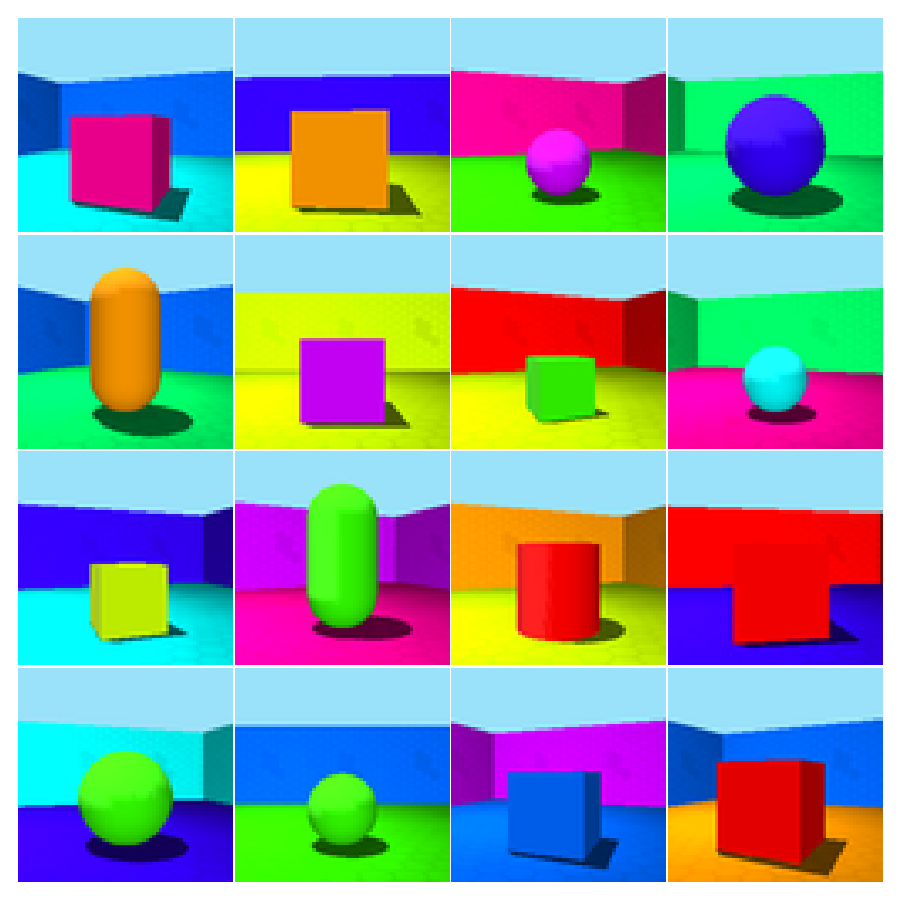

In [81]:
viz['original'][0].view(scale=2)

<IPython.core.display.Javascript object>


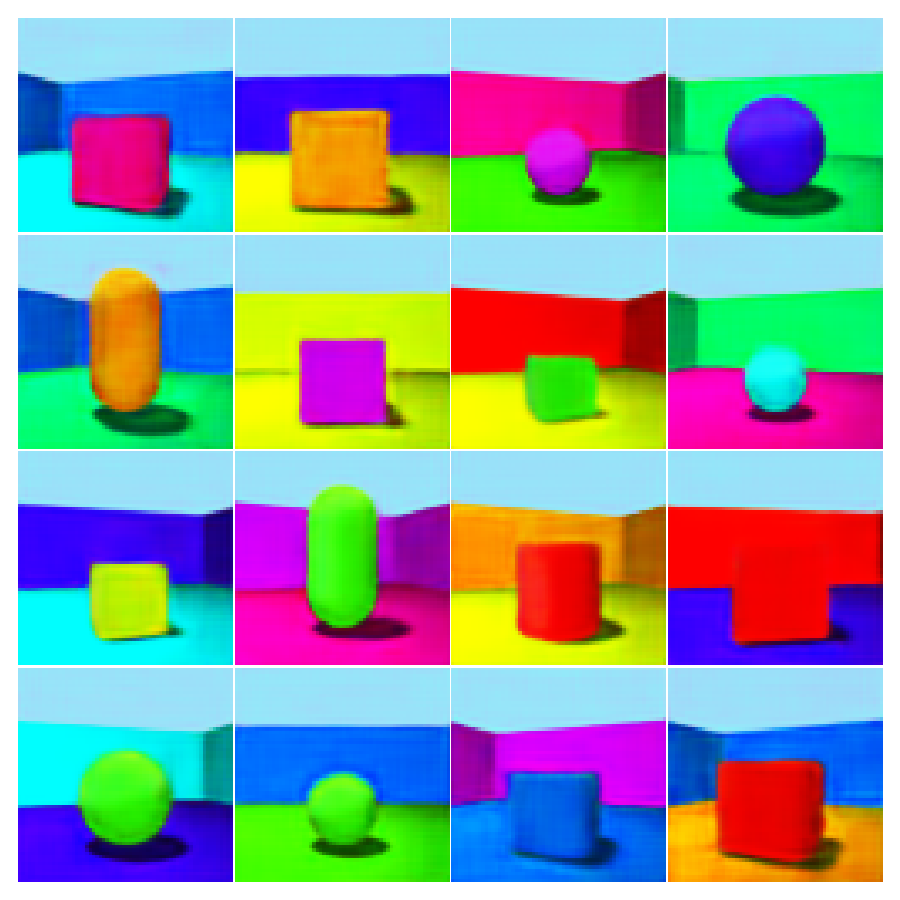

In [82]:
viz['recs'][0].view(scale=2)

<IPython.core.display.Javascript object>


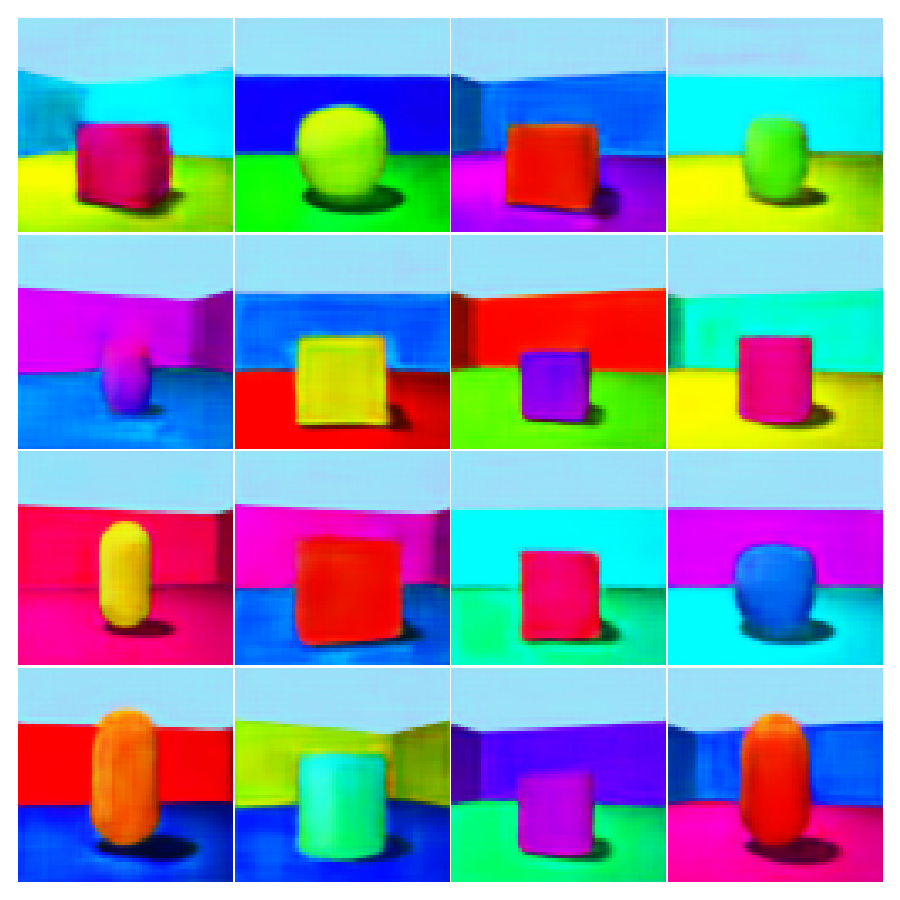

In [83]:
viz['hybrid'][0].view(scale=2)

<IPython.core.display.Javascript object>


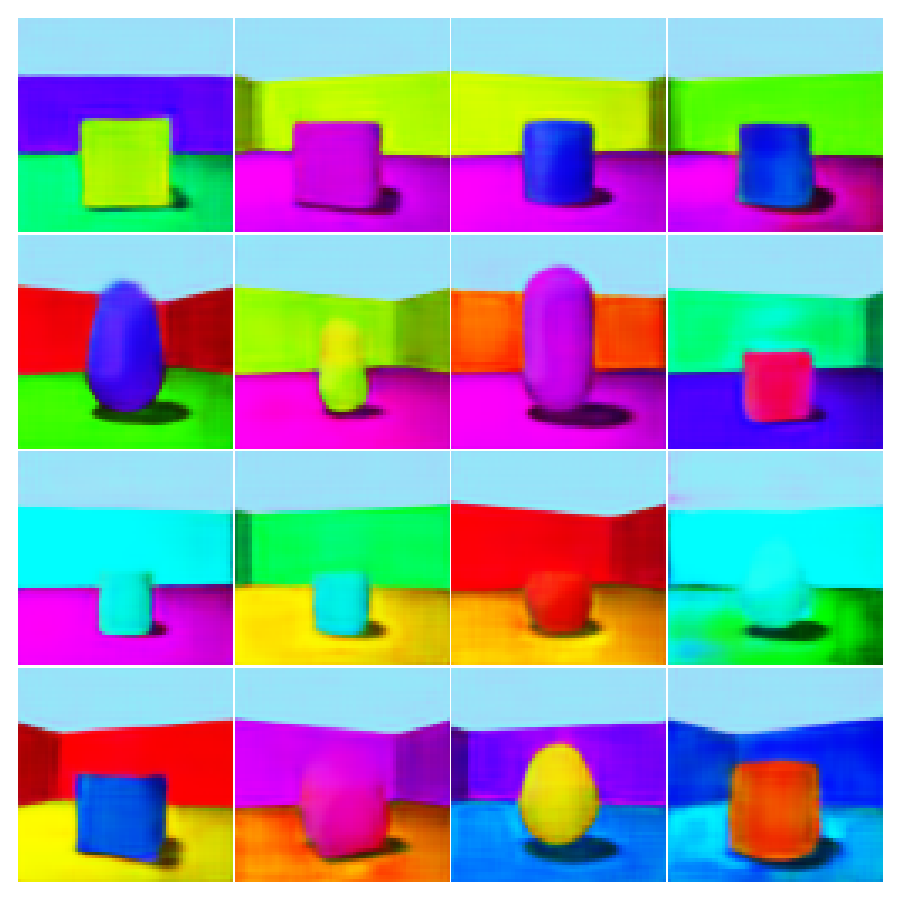

In [84]:
viz['gens'][0].view(scale=2)

In [85]:
viz['traversals'][2].view(scale=2)

<IPython.core.display.Javascript object>


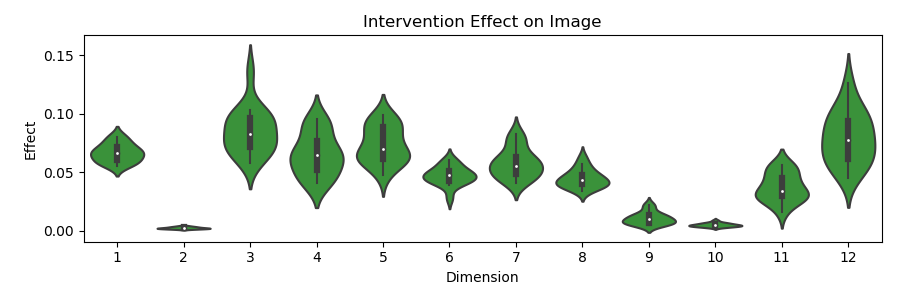

In [86]:
viz['effects'][0].view(scale=2)

<IPython.core.display.Javascript object>


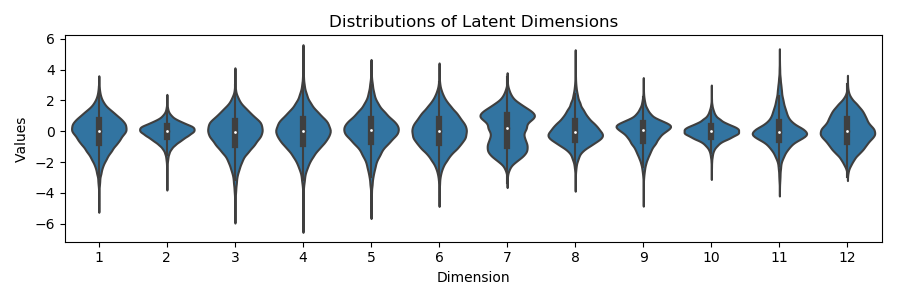

In [87]:
fig = viz['latent'][0].view(scale=2)
# # plt.figure(fig.number)
# # ax = fig.get_axes()[0]
# # ax.set_ylim(-3, 3)
fig

In [88]:
# evals = run.evaluate(pbar=tqdm)

In [89]:
# update_checkpoint(S, 'evals', overwrite=True)

In [90]:
# 'FID-prior': 52.483717550697236,
#  'FID-hyb': 51.906775365647974,
#  'FID-rec': 38.42281377504153,

In [48]:
# S.keys()

In [49]:
# S.hello = 'world'

In [30]:
# update_checkpoint(S, 'hello')

In [31]:
# viz_

In [32]:
# S.fid_gen_stats.keys()

In [33]:
# update_checkpoint(S, 'fid_gen_stats', overwrite=True)

In [34]:
# import pickle

In [35]:
# path = os.path.join(os.environ["FOUNDATION_DATA_DIR"], '3dshapes', '3dshapes_stats_fid.pkl')
# f = pickle.load(open(path,'rb'))

In [36]:
# f

In [37]:
# run.state.keys()

In [38]:
# model = run.state.model

In [39]:
# q = run.state.q
# q.shape

In [40]:
# with torch.no_grad():
#     imgs = model.decode(q.div(100))
# imgs.shape

In [41]:
# show_nums(imgs)

In [91]:
media_root = '/is/ei/fleeb/workspace/media/hybrid/viewing/'
run.save(media_root)

Saving results to: /is/ei/fleeb/workspace/media/hybrid/viewing/3dshapes-dwae_0004-6026551-03_200129-003324_ckpt39
	Model saved
	Config saved
	Visualization saved
	Results saved: val_Q


'/is/ei/fleeb/workspace/media/hybrid/viewing/3dshapes-dwae_0004-6026551-03_200129-003324_ckpt39'